In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.cluster import KMeans
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [17]:
movie_df_with_embedd = pd.read_csv(r'D:\WorkLab\RecSystem\data\movie_df_with_embeddings.csv')

In [3]:
def train_kmeans_model(df, n_clusters=70):

    #df['embedding'] = df['embedding'].apply(lambda x: np.array(ast.literal_eval(x)))
    
    movie_embeddings = list(df['embedding'])
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(movie_embeddings)

    df['cluster'] = clusters
    
    print(df)

    return kmeans, df

In [4]:
def metrics(df):
    X_emb = np.array(df['embedding'].tolist())  
    labels = df['cluster']                      
    sill_score = silhouette_score(X_emb, labels)
    db_score = davies_bouldin_score(X_emb, labels)
    print(f'Коэффициент Дэвиса: {db_score}')
    print(f'Силуэтный коэффициент: {sill_score}')

In [18]:
movie_df_with_embedd['embedding'] = movie_df_with_embedd['embedding'].apply(ast.literal_eval)

In [16]:
movie_df_with_embedd

,movieId,title,genres,embedding,embedding_list
0,1,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...","[-0.0466427206993103, 0.025392401963472366, 0....","[-0.0466427206993103, 0.025392401963472366, 0...."
1,2,Jumanji (1995),"['Adventure', 'Children', 'Fantasy']","[-0.0466427206993103, 0.025392401963472366, 0....","[-0.0466427206993103, 0.025392401963472366, 0...."
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']","[-0.0197464469820261, -0.04607229307293892, -0...","[-0.0197464469820261, -0.04607229307293892, -0..."
3,4,Waiting to Exhale (1995),"['Comedy', 'Drama', 'Romance']","[-0.0197464469820261, -0.04607229307293892, -0...","[-0.0197464469820261, -0.04607229307293892, -0..."
4,5,Father of the Bride Part II (1995),['Comedy'],"[-0.0197464469820261, -0.04607229307293892, -0...","[-0.0197464469820261, -0.04607229307293892, -0..."
...,...,...,...,...,...
62418,209157,We (2018),['Drama'],"[0.0036846771836280823, -0.0424957275390625, 0...","[0.0036846771836280823, -0.0424957275390625, 0..."
62419,209159,Window of the Soul (2001),['Documentary'],"[0.04912317916750908, -0.0037118904292583466, ...","[0.04912317916750908, -0.0037118904292583466, ..."
62420,209163,Bad Poems (2018),"['Comedy', 'Drama']","[-0.0197464469820261, -0.04607229307293892, -0...","[-0.0197464469820261, -0.04607229307293892, -0..."
62421,209169,A Girl Thing (2001),['(no genres listed)'],"[0.007933378219604492, 0.00995192676782608, 0....","[0.007933378219604492, 0.00995192676782608, 0...."


In [19]:
kmeans_model, df_with_clusters = train_kmeans_model(movie_df_with_embedd)

       movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
62418   209157                           We (2018)   
62419   209159           Window of the Soul (2001)   
62420   209163                    Bad Poems (2018)   
62421   209169                 A Girl Thing (2001)   
62422   209171      Women of Devil's Island (1962)   

                                                  genres  \
0      ['Adventure', 'Animation', 'Children', 'Comedy...   
1                   ['Adventure', 'Children', 'Fantasy']   
2                                  ['Comedy', 'Romance']   
3                         ['Comedy', 'Drama', 'Romance']   
4                                             ['Com

In [20]:
movie_df_with_embedd['cluster'].nunique()

70

In [23]:
df_with_clusters.to_csv('df_with_clusters.csv', index=False)

In [21]:
def plot_clusters(df):
    
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(np.array(df['embedding'].tolist()))

    # Добавляем уменьшенные эмбеддинги в датасет
    df['pca1'] = reduced_embeddings[:, 0]
    df['pca2'] = reduced_embeddings[:, 1]

    # Создаём кастомную палитру из 60 цветов
    custom_palette = sns.color_palette("tab20", 20) + sns.color_palette("hsv", 20)

    # Строим график
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette=custom_palette, s=60, alpha=0.7)
    plt.title('Visualization of Movie Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(loc='best', bbox_to_anchor=(1, 1), title='Clusters', ncol=3)
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24232\1274980548.py:15: UserWarning: 
The palette list has fewer values (40) than needed (70) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette=custom_palette, s=60, alpha=0.7)


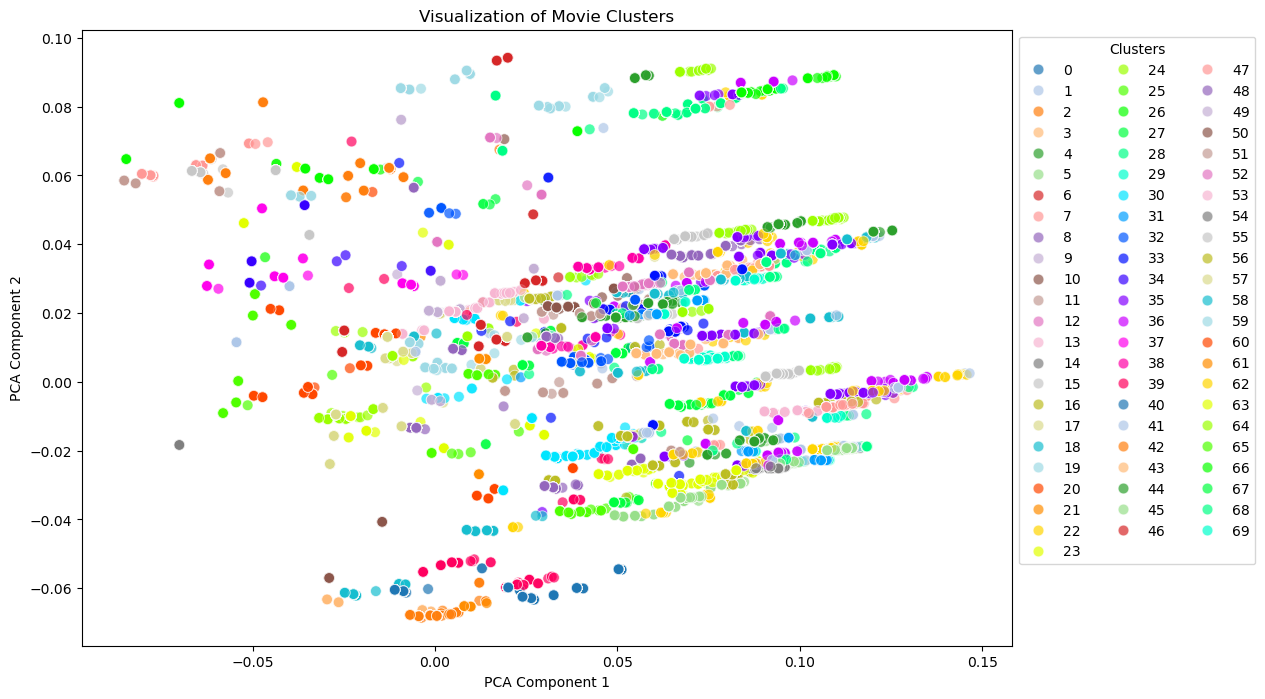

In [22]:
plot_clusters(df_with_clusters)

In [25]:
joblib.dump(kmeans_model, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [24]:
metrics(df_with_clusters)


Коэффициент Дэвиса: 1.0969928254961874
Силуэтный коэффициент: 0.7363396200011597


In [ ]:
100
1.0554052636061115
0.7915022518976889
80
1.0999404801049988
0.7549255798694378
60
1.1291167106103763
0.7168845447323989
40
1.35344434705347156
0.639445341
20
1.330947067060187
0.5424159881008

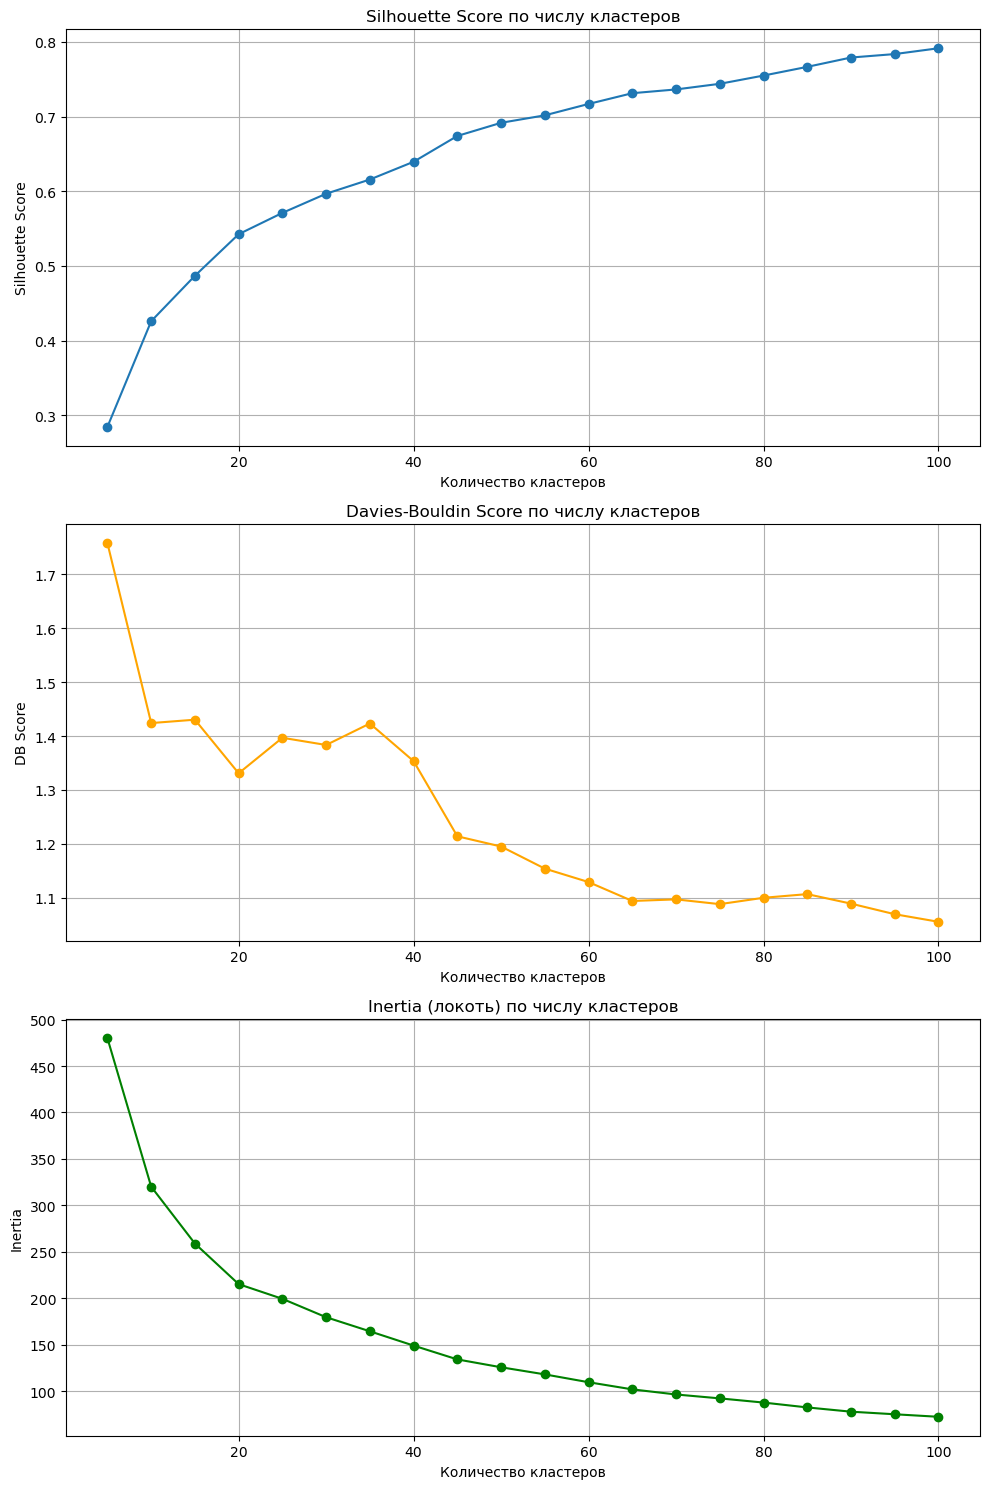

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np


X_emb = np.array(df_with_clusters['embedding'].tolist())  

k_values = range(5, 101, 5)

silhouette_scores = []
db_scores = []
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_emb)

    silhouette = silhouette_score(X_emb, labels)
    db = davies_bouldin_score(X_emb, labels)
    inertia = kmeans.inertia_

    silhouette_scores.append(silhouette)
    db_scores.append(db)
    inertias.append(inertia)


fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Silhouette Score
ax[0].plot(k_values, silhouette_scores, marker='o')
ax[0].set_title('Silhouette Score по числу кластеров')
ax[0].set_xlabel('Количество кластеров')
ax[0].set_ylabel('Silhouette Score')
ax[0].grid(True)


ax[1].plot(k_values, db_scores, marker='o', color='orange')
ax[1].set_title('Davies-Bouldin Score по числу кластеров')
ax[1].set_xlabel('Количество кластеров')
ax[1].set_ylabel('DB Score')
ax[1].grid(True)

ax[2].plot(k_values, inertias, marker='o', color='green')
ax[2].set_title('Inertia (локоть) по числу кластеров')
ax[2].set_xlabel('Количество кластеров')
ax[2].set_ylabel('Inertia')
ax[2].grid(True)

plt.tight_layout()
plt.show()
